**Read one left, center and right training images and show them.**

In [1]:
import os
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
%matplotlib inline

images_folder = "data/IMG"

sample_images_names = list()

for file in os.listdir(images_folder):
    if file.startswith('left_'):
        sample_images_names.append(file)
        break

for file in os.listdir(images_folder):
    if file.startswith('center_'):
        sample_images_names.append(file)
        break

for file in os.listdir(images_folder):
    if file.startswith('right_'):
        sample_images_names.append(file)
        break

sample_images = [mpimg.imread(images_folder + "/" + file) for file in sample_images_names]
img_name = sample_images_names[0].strip().split(".")[0]
format_name = sample_images_names[0].strip().split(".")[-1]

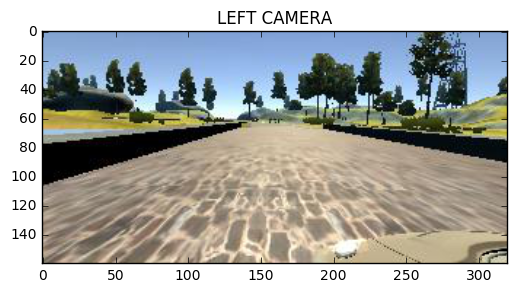

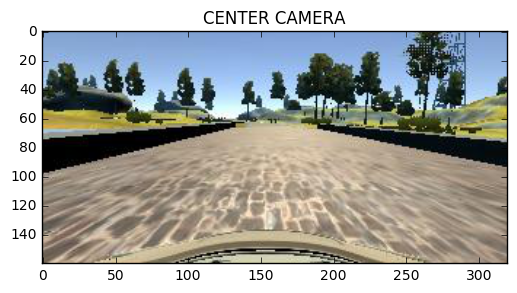

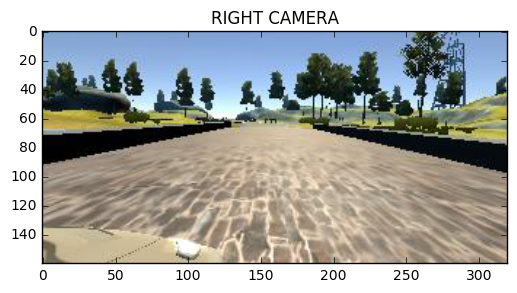

In [2]:
plt.imshow(sample_images[0])
plt.title('LEFT CAMERA')
plt.show()

plt.imshow(sample_images[1])
plt.title('CENTER CAMERA')
plt.show()

plt.imshow(sample_images[2])
plt.title('RIGHT CAMERA')
plt.show()

**Histogram representation of different steering angles in udacity data**

As evident, most of the steering angle values are in and around zero.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195de5f8>]], dtype=object)

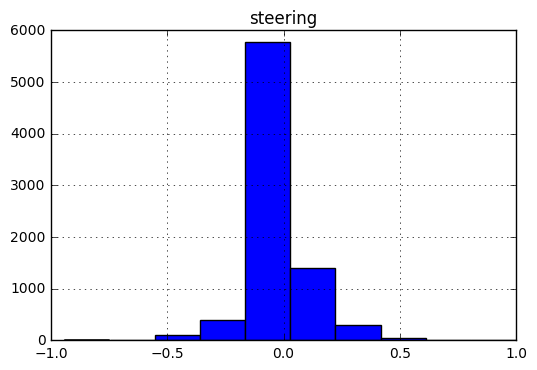

In [3]:
import pandas as pd

df = pd.read_csv('data/driving_log.csv')

df.hist(column='steering')

**Applying augmentation techniques on a sample image and initial steering angle 0. Steps:-**
  
    1) Adding shear to an image. There is 90% probability of adding shear to every image.
    
    2) Cropping the top 25% of the image and bottom 25 units of the image.
    
    3) Randomly flipping the image. Every image has a 50% probability of being flipped.
    
    4) Randomly changing the brightness of the image. The image is converted from RGB to HSV color channel. The V channel is randomly changed. Then, the image is converted back from HSV to RGB.
    
    5) After the above 4 steps are done, the input image of size (320, 160, 3) is reshaped to (64, 64, 3).

In [9]:
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()
    
    
def resize_image(image):
    final_shape = (64, 64)
    image_final = cv2.resize(image, final_shape, interpolation=cv2.INTER_AREA)
    return image_final


def change_brightness(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    bright_rand = .4 + np.random.uniform()
    img[:, :, 2] = img[:, :, 2] * bright_rand
    image_final = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return image_final


def random_shear(image, steering_angle, shear_range=200):
    rows, cols, ch = image.shape
    dx = np.random.randint(-shear_range, shear_range + 1)
    random_point = [cols / 2 + dx, rows / 2]
    pts1 = np.float32([[0, rows], [cols, rows], [cols / 2, rows / 2]])
    pts2 = np.float32([[0, rows], [cols, rows], random_point])
    dsteering = dx / (rows / 2) * 360 / (2 * np.pi * 25.0) / 6.0
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, (cols, rows), borderMode=1)
    steering_angle += dsteering

    return image, steering_angle


def crop_image(image):
    shape = image.shape
    img = image[shape[0] // 4:shape[0] - 25][0:shape[1]]
    return img


def random_flip(image, steering_angle):
    rand_val = np.random.randint(1)
    if rand_val:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle

    return image, steering_angle

def transform_image(image, steering_angle):
    rand_prob = bernoulli.rvs(0.9)
    if rand_prob:
        image, steering_angle = random_shear(image, steering_angle)
        show_image(image, "RANDOM SHEAR")
    img = crop_image(image)
    show_image(img, "CROP")
    img, steer_angle = random_flip(img, steering_angle)
    show_image(img, "RANDOM FLIP")
    img = change_brightness(img)
    show_image(img, "BRIGHTNESS")
    img = resize_image(img)
    return img, steer_angle

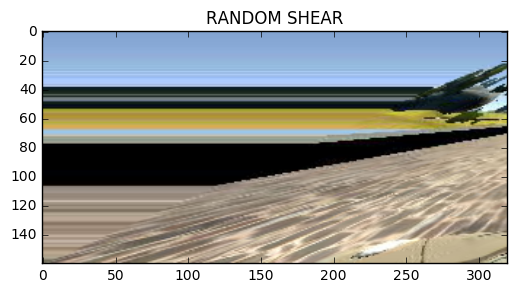

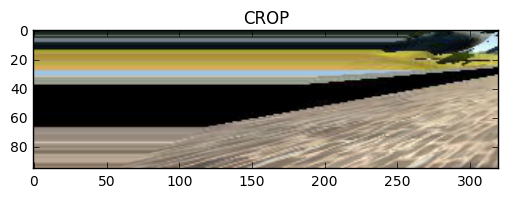

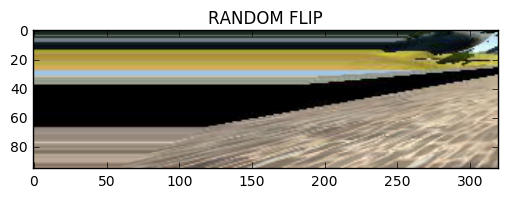

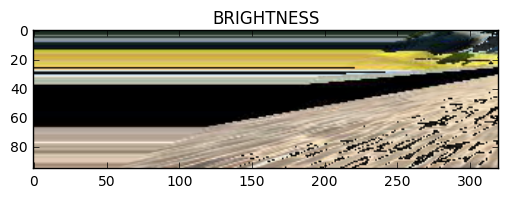

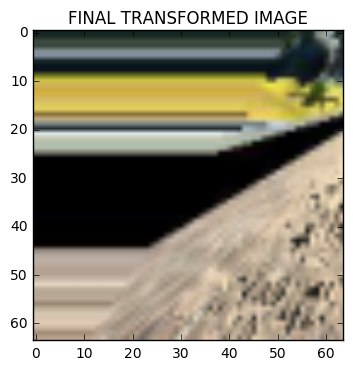

NEW STEERING ANGLE - 0.8451127478179642


In [10]:
from scipy.stats import bernoulli
new_img, new_angle = transform_image(sample_images[0], 0.0)
plt.imshow(new_img)
plt.title('FINAL TRANSFORMED IMAGE')
plt.show()
print("NEW STEERING ANGLE - {}".format(new_angle))